In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from Ge_calculation import GAP
import matplotlib.pyplot as plt
from ase.io.cfg import read_cfg
from ase.io.extxyz import write_extxyz
from ase.neighborlist import neighbor_list
import numpy as np
import re
from sys import argv
import os

In [ ]:
data_dir = '/Users/Moji/Documents/Summer20/Ge/'
train_file = data_dir + 'Structure_databases/train_216_125_64_v.xyz'
val_file = data_dir + 'Structure_databases/validate_216_125_64_v.xyz'
pot_v = data_dir + 'Potentials/Ge_2bSOAP_5000_125_216_d155_v/Ge_2bSOAP_5000_125_216_d155_v.xml'

In [13]:
d155_v_test = GAP(train_file, val_file, pot_v)
d155_v_test.load('/Users/Moji/Documents/Summer20/Ge/Pickles/d155_v')
d155_v_test.cfi_i_T

Training set structure count: 281
Validation set structure count: 70
Read configs, now fixing virials
Config labels: ['amorph', 'liq', 'hiT_liq', 'hiT_amorph', 'inter']
Load successful
data_dict:  dict_keys(['QM_E_t', 'QM_F_t', 'QM_V_t', 'GAP_E_t', 'GAP_F_t', 'GAP_V_t', 'E_err_t', 'F_err_t', 'V_err_t', 'E_rmse_t', 'F_rmse_t', 'V_rmse_t', 'QM_E_v', 'QM_F_v', 'QM_V_v', 'GAP_E_v', 'GAP_F_v', 'GAP_V_v', 'E_err_v', 'F_err_v', 'V_err_v', 'E_rmse_v', 'F_rmse_v', 'V_rmse_v'])


[0, 56, 112, 168, 224, 280, None]

In [14]:
d155_v_test.calc_similarity()

In [4]:
from Ge_analysis import *


/Users/Moji/PycharmProjects/Ge_analysis_local/Ge_analysis.py:307: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


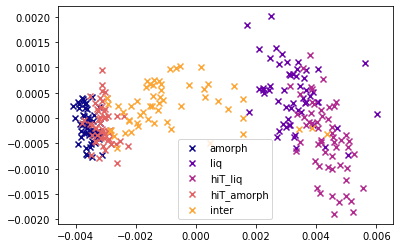

In [44]:
similarity_map(d155_v_test)

In [4]:
file = '/Users/Moji/Documents/Summer20/Ge/lammps/Si_testrun/run_64001/NPT/'
read_cfg(file+'dump_npt_Si_gap.239000.cfg')

Atoms(symbols='Si64', pbc=True, cell=[10.9467, 10.9467, 10.9467], masses=...)

In [102]:
file = '/Users/Moji/Applications/rings-code-v1.3.4/test/gr/gr.dat'
dire = '/Users/Moji/Documents/Summer20/Ge/MD_runs/2bSOAP_5000_125_216_d155/run_64001/NPT/analysis/'
def read_dat(filey):
    with open(filey) as f:
        lines = f.readlines()
    dat = [[] for i in range(len(lines[1].split()))]
    for i in lines[:]:
        d = i.split()
        for j, val in enumerate(d):
            dat[j].append(float(val))
    dat = np.array(dat)
    return dat


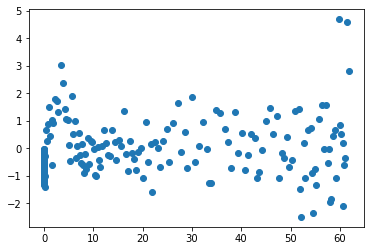

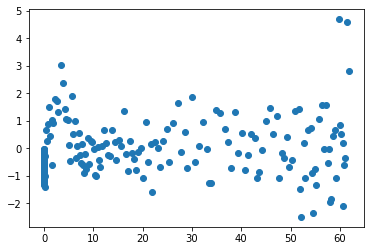

In [96]:
fig, ax = plt.subplots()
ax.scatter(gr[2], gr[1])
fig

In [99]:
sq = read_dat(dire + 'sq/sq-xrays.dat')
gr = read_dat(dire + 'gr/gr.dat')

In [103]:
rstat = read_dat(dire + 'rstat/rings-3.dat')

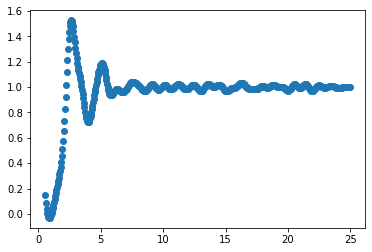

In [95]:
fig, ax = plt.subplots()
ax.scatter(sq[0], sq[1])

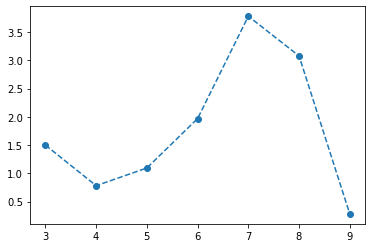

In [110]:
fig, ax = plt.subplots()
ax.scatter(rstat[0], rstat[1])
ax.plot(rstat[0], rstat[1], linestyle='--')
fig.savefig('/Users/Moji/Documents/Summer20/Ge/Analysis/rstat.png')

In [100]:
rstat


array([[4.   , 5.   , 6.   , 7.   , 8.   , 9.   ],
       [0.781, 1.094, 1.969, 3.781, 3.078, 0.281],
       [0.781, 0.531, 0.25 , 0.   , 0.   , 0.   ]])

In [107]:
os.getcwd()


'/Users/Moji/PycharmProjects/Ge_analysis_local'

In [11]:
a = {}
test = ['h=t', 'k=l']
for i in test:
    a[i.split('=')[0]] = i.split('=')[1]

a['gap'] = {'b': 'c'}
a

{'h': 't', 'k': 'l', 'gap': {'b': 'c'}}

In [19]:
for i in a.keys():
    print(i, a[i])

h t
k l
gap {'b': 'c'}


In [18]:
a.values()

dict_values(['t', 'l', {'b': 'c'}])

In [36]:
a = 'gap={distance_Nb a=1 b=2 : SOAP c=3 d=4}'

x = a.split('{')
x[1] = x[1].replace('}', '')
y = x[1].split(':')
#y.split('=')
for k in y:
    for l in k.split():
        print(l.split('='))

['distance_Nb']
['a', '1']
['b', '2']
['SOAP']
['c', '3']
['d', '4']
